# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [3]:
#your code here
diamonds.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.405803,3.051020,61.749405,57.457184,3932.799722,5.731157,5.732791,3.539247
std,0.474011,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.112887,0.693204
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,9.940000,8.060000


In [ ]:
#your comments here

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [ ]:
#your hypotheses here

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [4]:
#your code here

diamonds.groupby('color').agg('mean')

,carat,clarity,depth,table,price,x,y,z
color,,,,,,,,
0,1.162137,2.776353,61.887215,57.812393,5323.818020,6.519338,6.515636,4.033251
1,1.026927,2.964035,61.846385,57.577278,5091.874954,6.222826,6.222008,3.846369
2,0.911799,2.933646,61.836850,57.517811,4486.669196,5.983335,5.978295,3.698256
3,0.771190,3.463425,61.757111,57.288629,3999.135671,5.677543,5.680192,3.507345
4,0.736538,3.133934,61.694582,57.433536,3724.886397,5.614961,5.619456,3.465062
5,0.657867,2.969889,61.662090,57.491201,3076.752475,5.411580,5.416108,3.337767
6,0.657795,2.691513,61.698125,57.404590,3169.954096,5.417051,5.421128,3.342827


**What do you see? Pay special attention to the relationship between price and color.**

In [ ]:
#your thoughts here

# It clearly stands out that clarity, depth, table, x, y, and z span more or less equally 
# accross all the colors scores, while price and carat decrease proportionally with higher colors,
# meaning that better the color score, higher the price and higher the carat

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

(array([ 2808.,  5422.,     0.,  8304.,     0., 11292.,  9542.,     0.,
         9797.,  6775.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

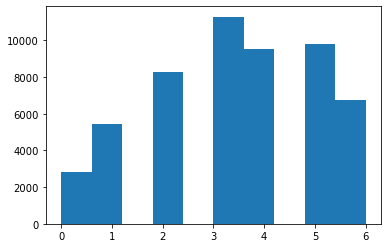

In [5]:
#your code here
plt.hist(x=diamonds['color'])

In [ ]:
#your comments here

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [11]:
#your code here
diamonds.groupby('carat').agg('mean')

,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,
0.20,5.166667,2.833333,61.100000,59.333333,365.166667,3.786667,3.753333,2.303333
0.21,5.444444,2.666667,60.511111,58.444444,380.222222,3.874444,3.837778,2.332222
0.22,4.800000,2.600000,61.620000,60.400000,391.400000,3.898000,3.848000,2.386000
0.23,4.518771,4.901024,61.426621,58.034130,486.143345,3.946382,3.973379,2.431468
0.24,4.185039,4.972441,61.599213,57.488189,505.185039,3.990157,4.019331,2.465591
...,...,...,...,...,...,...,...,...
4.00,1.000000,0.000000,63.300000,58.000000,15984.000000,10.010000,9.940000,6.310000
4.01,0.500000,0.000000,61.750000,61.500000,15223.000000,10.080000,8.062700,6.205000
4.13,2.000000,0.000000,64.800000,61.000000,17329.000000,10.000000,9.850000,6.430000


In [ ]:
#your comments

# Looking at this table we can do the following observations:
# - The higher the carat, the lower (=better) the color
# - The higher the carat, the lower (=better) the clarity
# - The higher the carat, the higher the price
# - The higher the carat, the bigger the size (x, y and z)


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

(array([2.5155e+04, 1.8626e+04, 7.1290e+03, 2.3490e+03, 6.1400e+02,
        5.3000e+01, 6.0000e+00, 5.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([0.2  , 0.681, 1.162, 1.643, 2.124, 2.605, 3.086, 3.567, 4.048,
        4.529, 5.01 ]),
 <BarContainer object of 10 artists>)

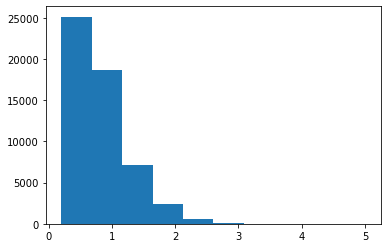

In [7]:
#your code here
plt.hist(x=diamonds['carat'])

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [8]:
#your code here
diamonds.groupby('table').agg('mean')

,carat,color,clarity,depth,price,x,y,z
table,,,,,,,,
43.0,1.0400,1.0,4.00,62.90,4997.0,6.450,6.410,4.040
44.0,0.2900,5.0,4.00,62.80,474.0,4.200,4.240,2.650
49.0,0.6500,3.0,3.00,64.25,2290.5,5.355,5.320,3.425
50.0,1.5100,3.0,2.00,61.50,8995.5,7.380,7.295,4.510
50.1,0.9400,2.0,1.00,66.00,3353.0,6.130,6.170,4.060
...,...,...,...,...,...,...,...,...
71.0,0.6800,3.0,2.00,58.00,1633.0,5.850,5.700,3.350
73.0,0.6025,4.5,3.25,68.90,2406.5,5.520,5.465,3.745
76.0,0.7900,3.0,2.00,65.30,2362.0,5.520,5.130,3.350


In [ ]:
#your comments here

# Looking at this table we can do the following observations:
# - The higher the table, the higher (=worst) the color
# - For the other features, there is no clear correlation, either positive or negative, 
#  with the table

**Finally, do the same with the `clarity` column.**

In [9]:
#your code here
diamonds.groupby('clarity').agg('mean')

,carat,color,depth,table,price,x,y,z
clarity,,,,,,,,
0,1.283846,2.968961,62.734278,58.303779,3924.168691,6.761093,6.694739,4.224688
1,1.077648,3.469980,61.772167,57.927181,5063.028606,6.401370,6.391938,3.951144
2,0.850482,3.448450,61.853042,57.662541,3996.001148,5.888383,5.888256,3.640636
3,0.763935,3.494208,61.724417,57.417401,3924.989395,5.657709,5.658859,3.492218
4,0.727158,3.161792,61.667458,57.315151,3839.455391,5.572178,5.578326,3.437504
5,0.596202,3.569483,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465
6,0.503321,3.351573,61.624651,56.884460,2523.114637,4.960364,4.975075,3.061294
7,0.505123,3.101676,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659


In [ ]:
#your comments here

# Looking at this table we can do the following observations:
# - The higher the clarity, the lower the carat
# - For the other features, there is no clear correlation, either positive or negative, 
#  with the clarity

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

,carat,price
0,0.20,365.166667
1,0.21,380.222222
2,0.22,391.400000
3,0.23,486.143345
4,0.24,505.185039
...,...,...
268,4.00,15984.000000
269,4.01,15223.000000
270,4.13,17329.000000
271,4.50,18531.000000


Text(0, 0.5, 'Price mean')

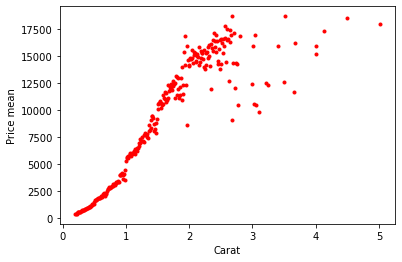

In [22]:
#your thoughts here
# The price seems to correlate positively with the carat. 
# We can test this hipothesis doing the following.

x = diamonds.groupby('carat').agg({'price':'mean'}).reset_index()
display(x)
plt.plot(x.carat, x.price, 'r.')
plt.xlabel('Carat')
plt.ylabel('Price mean')

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


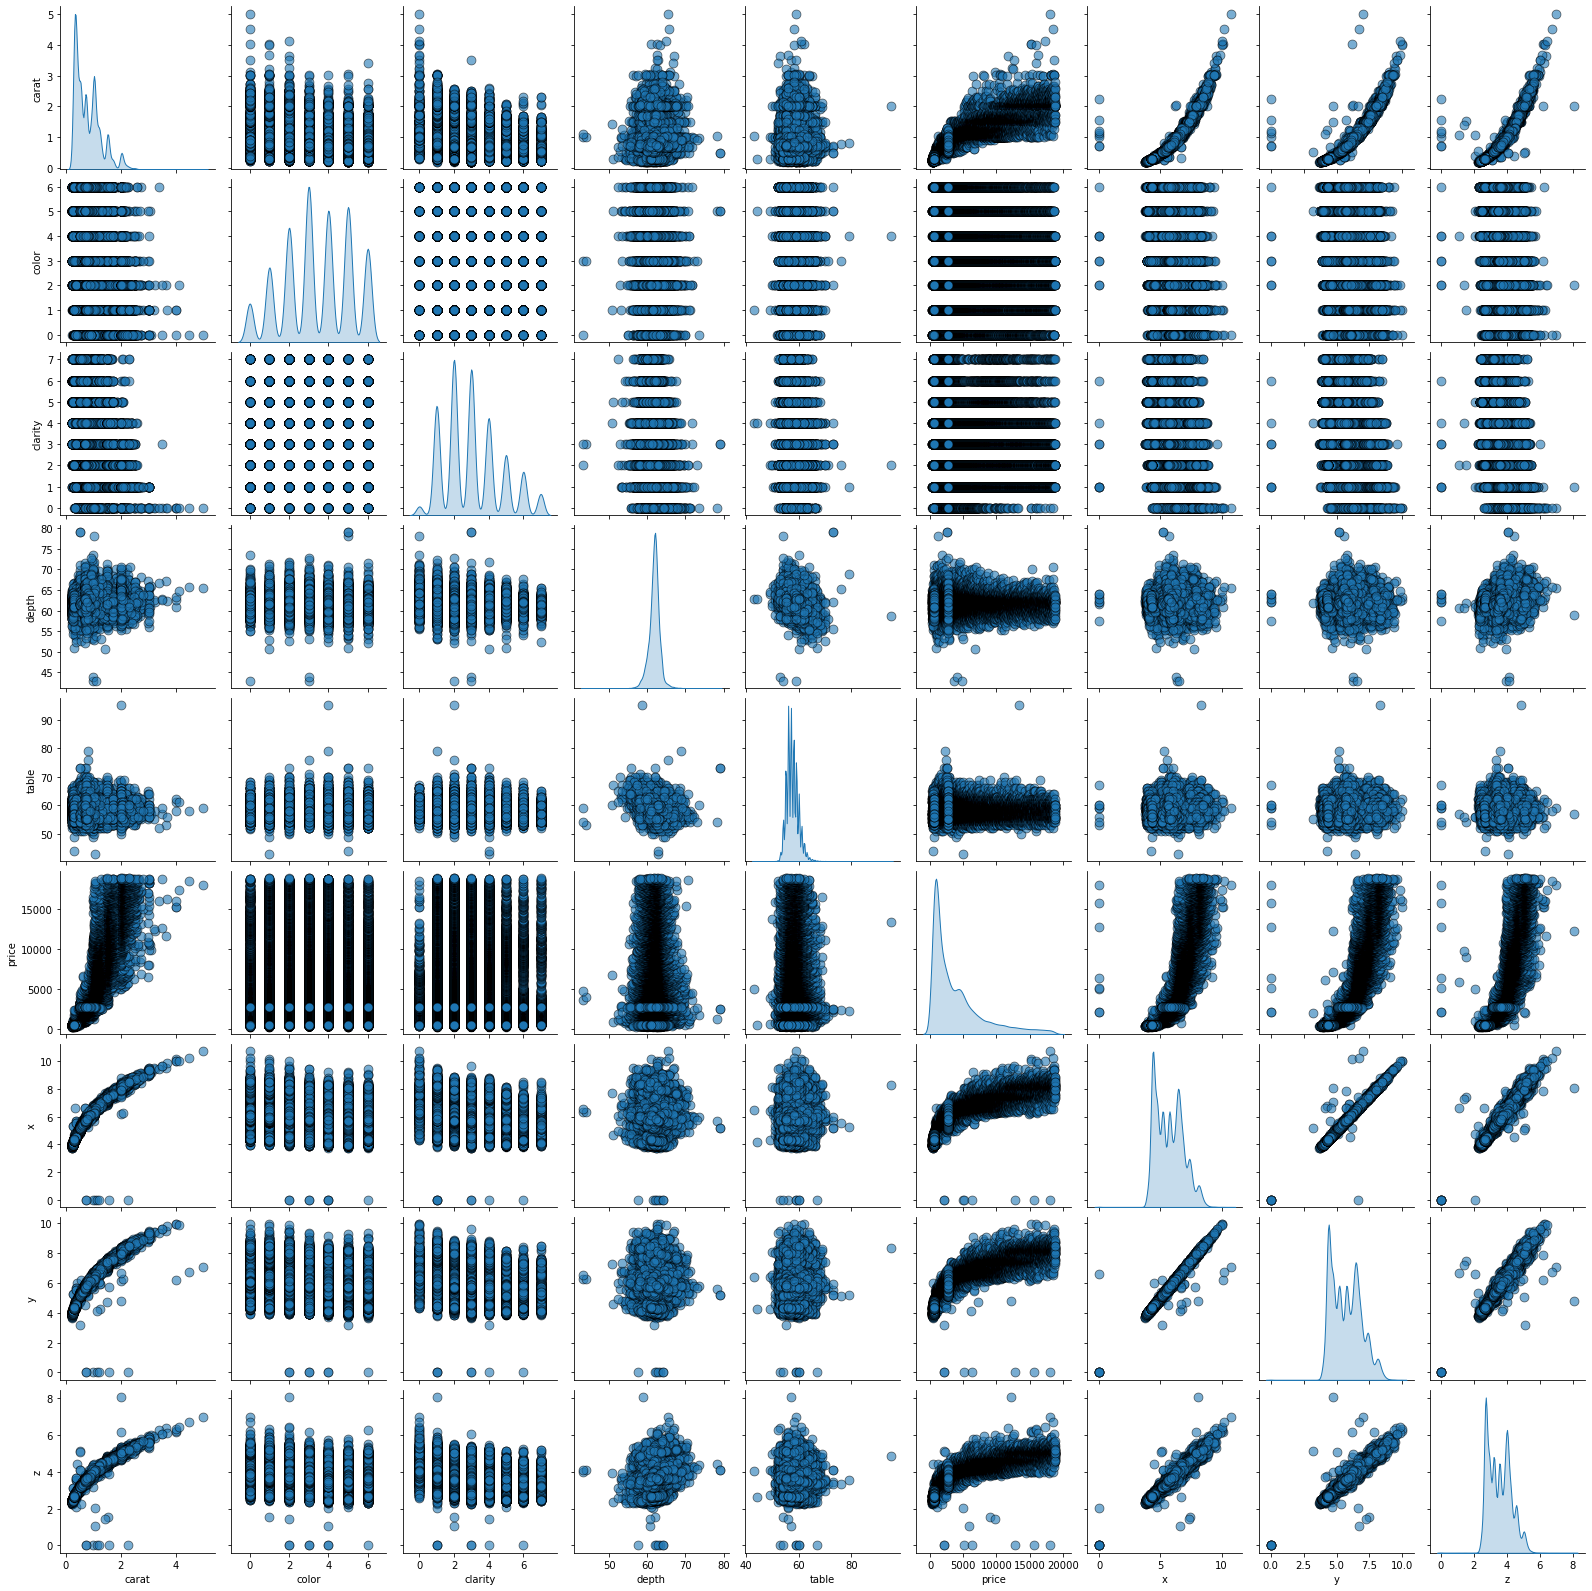

In [16]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here

# The highest correlations seem the correlations between size measurements, 
# for example x vs z, x vs y and z vs y. However, this is not so informative. It is logical
# to think that if one of them is higher, the other also increase. For this, we would not 
# explore them much more. Instead, the most interesting correlations seem to be
# - price vs carat
# - price vs size (x, y and z)
# We would therefore explore more these correlations.

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

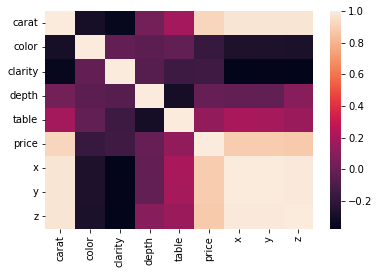

In [31]:
# your code here
import seaborn as sns
corr = diamonds.corr()

sns.heatmap(corr)
plt.show()

**What do you see here? Regarding the results before, does it fit with them?**

In [ ]:
#your thoughts here
# The heat map highlight a strong positive correlation between the price and x, y, z and carat.
# Moreover, it show that also the carat is strongly positively correlated with the size.
# We can also observe some interesting negative correlations, for example between carat and density
# carat and color, and btween both color and density and the size measurements.

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

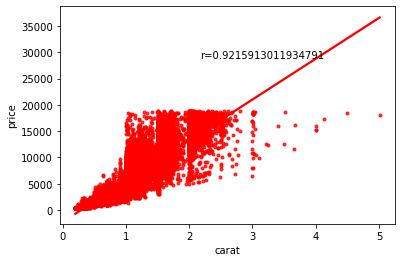

In [48]:
# your code here
import scipy
linreg = scipy.stats.linregress(diamonds.carat,diamonds.price)[2]
# linreg
sns.regplot(x="carat", y="price", data=diamonds, color='red', marker='.');
plt.figtext(0.45,0.7, f'r={linreg}')
plt.show()

**What do you think?**

In [ ]:
#your thoughts here

# The hypothesis turned out to be true. There is a high correlation between carat and price.

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here

# We could explore a bit more the correlation between carat and size.

**Conclusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.